<a href="https://colab.research.google.com/github/YebinLeee/Machine-Learning-Study/blob/main/CH09_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_RNN%2C_LSTM%2C_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Machine Learning Seminar </h1>

- CH 09 텍스트를 위한 인공 신경망
- 2021.10.12

<br><hr><br>

<h2> 순차 데이터 (Sequential Data) </h2>

- 순차 데이터: 순서가 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터
- 시간적 의미가 있는 경우 Temporal Sequence / 일정한 시간차라면 Time Series (시계열)
- ex) DNA 염기서열, 세계 기온변화, 샘플링된 소리 신호, 주식 데이터

<br>

<h2> Resampling </h2>

: Temporal Sequence를 Time Series로 변환하기 위한 리샘플링(Resampling) 과정
- 취득된 데이터(Temporal Sequence)를 이용해 신호 보간 (Interpolation)하고, 균일 시간 간격으로 이를 샘플링 하는 과정

<br>

<h2> RNN (Recurrent Neural Network) </h2>

- 타임 스텝으로 펼쳐진 순환 신경망
- 셀: 순환층, 활성화 함수(tanh - hyperbolic tangent function)에 의한 값이 순환적으로 입력됨
- 각 타임 스텝마다 동일한 가중치를 사용(가중치 공유)
- 출력 결과 값(은닉 상태:Hidden State)

<br>

- 셀의 가중치 : 순환층에 입력되는 특성의 개수 * 순환층의 뉴런 개수
- 시퀀스: 하나의 샘플

- 토큰 : 하나의 단어를 정수로 매핑 (1개의 토큰 -> 1 타임스텝)

<br><br><hr><br>


<h2> 순환 신경망으로 IMDB 리뷰 분류하기 <h2>





In [3]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500) # num_words = 어휘 사전을 500개 사용하도록

print(train_input.shape, test_input.shape) # train_input [리뷰 1, 리뷰2, 리뷰3...] (25000,) (25000,)


print(len(train_input[0])) # 218: 첫번째 리뷰의 토큰: 218개


print(len(train_input[1])) # 189: 두번째 리뷰의 토큰: 189개


print(train_input[0]) # 첫번째 리뷰의 토큰(정수)들 모두 출력

# 타깃 데이터 출력
print(train_target[:20]) # 0:부정, 1:긍정

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


239.00925 178.0


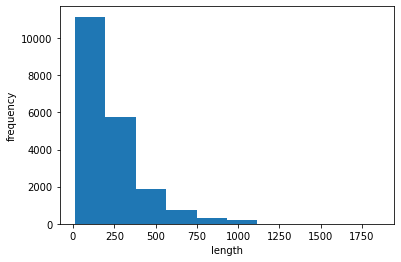

In [4]:
from sklearn.model_selection import train_test_split

# 훈련, 테스트 데이터 분리 (훈련: 20,000개, 테스트: 5,000개)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

import numpy as np
lengths = np.array([len(x) for x in train_input]) # 모든 리뷰의 길이
print(np.mean(lengths), np.median(lengths)) # 리뷰 길이의 평균값(239개의 토큰값), 중간값(178) => 매우 긴 리뷰들이 소수 있음을 확인할 수 있음


import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()


<br>

<h3> 패딩 작업 </h3>
- 비어있는 토큰 자리를 모두 0으로 채워 넣는 작업, 또는 지정한 길이보다 긴 시퀀스를 자르는 과정

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 입력 데이터의 길이를 100개의 토큰 길이로 잡는다. (maxlen = 100), 100보다 작으면 sequence padding과정이 이루어짐 -> 타임 스텝의 개수: 100
train_seq = pad_sequences(train_input, maxlen=100) # maxlen 보다 긴 시퀀스의 앞부분을 자름 (뒷 부분의 정보가 더 유용하리라 기대하기 때문)

print(train_seq.shape) # (20000, 100) -> 20,000개의 리뷰 데이터, 100개의 타임 스탭(토큰 개수)


print(train_seq[0])

print(train_input[0][-10:]) # 앞부분이 0으로 채워져있음을 확인 가능


print(train_seq[5])


val_seq = pad_sequences(val_input, maxlen=100)


(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


<br>

<h3> 순환 신경망 모델 만들기 </h3

- SimpleRNN 클래스

In [10]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 100개의 타임 스텝, 어휘 사전의 500개의 단어(토큰)을 사용하도록 설정
model.add(keras.layers.Dense(1, activation='sigmoid'))


# 원-핫 인코딩 (500개의 원소 중 1개를 제외하고 나머지는 0값으로 설정)
train_oh = keras.utils.to_categorical(train_seq) 
print(train_oh.shape) # (20000, 100, 500) -> 20,000개의 데이터 , 100개의 타임 스텝, 500개의 어휘 사전


print(train_oh[0][0][:12])


print(np.sum(train_oh[0][0]))


val_oh = keras.utils.to_categorical(val_seq)

model.summary()

# 4072 개 (500개 어휘사전 * 뉴런 8개 + 64개의 가중치(은닉상태크기*뉴런 개수) + 절편8)

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


<br>

<h3> 순환 신경망 훈련 </h3>

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)


# RMSprop 객체 별도로 생성하여 학습률을 0.0001로 지정
# 에포크 횟수 100, 배치 크기 64
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 15s 45ms/step - loss: 0.6956 - accuracy: 0.5076 - val_loss: 0.6930 - val_accuracy: 0.5166
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6883 - accuracy: 0.5429 - val_loss: 0.6824 - val_accuracy: 0.5722
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6752 - accuracy: 0.5907 - val_loss: 0.6702 - val_accuracy: 0.6026
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6580 - accuracy: 0.6347 - val_loss: 0.6504 - val_accuracy: 0.6526
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6380 - accuracy: 0.6724 - val_loss: 0.6326 - val_accuracy: 0.6774
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6189 - accuracy: 0.6962 - val_loss: 0.6150 - val_accuracy: 0.7016
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6003 - accuracy: 0.7164 - val_loss: 0.5977 - val_ac

<br><br>

원-핫 인코딩으로는 앞뒤 단어들과의 관계를 살펴보기 어려움
<br><br>


<h2> 단어 임베딩 (Word Embedding) </h2>

- 단어들끼리의 연관성 추가
- 각 단어를 고정된 크기의 실수 벡터로 바꾸어줌
- Embedding 클래스 추가



In [12]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


<br>

RNN의 한계점
- 기본 순환층은 긴 시퀀스를 학습하기 어려움 -> 시퀀스가 길수록 은닉 상태에 담긴 정보가 점차 희석되며, 멀리 떨어져 있는 단어 정보를 인식하는데 어려움이 있음

<br><br>

<h2> LSTM (Long Short-Term Memory </h2>

- RNN의 한계점을 보완하여, 단기 기억을 오래 기억하기 위해 고안된 모델
- 순환되는 상태가 2 개 (은닉 상태 + 셀 상태)

<br>

<h3> Cell State </h3>

- 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
- 셀 상태의 계산 과정 -> 입력과 은닉 상태를 또다른 가중치에 곱한 후 시그모이드 함수를 통화시키고, 이전 타임스텝의 셀상태와 곱하여 새로운 셀 상태 생성 -> tanh 함수를 통과하여 새로운 은닉 상태 생성
<br>

- Forget gate layer : 셀 상태에 있는 정보를 제거하는 역할의 삭제 게이트
- Input gate layer : 새로운 정보를 셀 상태에 추가하는 역할의 입력 게이트
- Output gate layer : 셀 상태가 다음 은닉 상태로 출력하는 역할의 출력 게이트

<br><br>

<h3> LSTM 신경망 훈련 </h3>





In [15]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))

model.add(keras.layers.LSTM(8)) # Embedding 이후, SimpleRNN 이 아닌 LSTM 클래스 사용
# 작은 셀 4개 -> 200에서 4배 늘어 800개의 파라미터 값을 갖게 됨


model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


<h3> LSTM 모델 훈련 </h3>



In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6920 - accuracy: 0.5553 - val_loss: 0.6908 - val_accuracy: 0.5986
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6871 - accuracy: 0.6452 - val_loss: 0.6817 - val_accuracy: 0.6616
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6513 - accuracy: 0.6945 - val_loss: 0.6193 - val_accuracy: 0.6884
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6007 - accuracy: 0.7057 - val_loss: 0.5919 - val_accuracy: 0.7106
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5740 - accuracy: 0.7311 - val_loss: 0.5671 - val_accuracy: 0.7388
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5527 - accuracy: 0.7494 - val_loss: 0.5494 - val_accuracy: 0.7434
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5331 - accuracy: 0.7620 - val_loss: 0.5321 - val_ac

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


<br><br>

<h3> 순환층에 드롭아웃 적용하기 </h3>

- 순환층의 자체적인 드롭아웃 기능 사용 (과대적합 예방 - train data에 의존성 막기 위함)

1. dropout 매개변수 - 셀의 입력에 드롭아웃 적용
2. recurrent_dropout 매개변수 - 순환되는 은닉 상태에 드롭아웃 적용

In [17]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # dropout  0.3 (30%입력 드롭아웃 적용)
model2.add(keras.layers.Dense(1, activation='sigmoid’))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])



SyntaxError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


<br>

<h3> 2개의 층 연결하기 </h3>

- 순환층 연결 할 때 은닉 상태를 마지막 타임 스텝에 대해 다음층으로 전달하기 위해, return_sequences 매개변수 True로 지정

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태 출력
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()


<br><br>

<h2> GRU (Gated Recurrent Unit) </h2>

- LSTM의 간소화한 버전 (가중치, 파라미터 값이 LSTM보다 적어 계산량 적음)
- 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- 셀 3개: 2개의 시그모이드 활성화 함수 + 1개의 tanh 활성화 함수





In [18]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 14s 40ms/step - loss: 0.6924 - accuracy: 0.5236 - val_loss: 0.6914 - val_accuracy: 0.5532
Epoch 2/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6904 - accuracy: 0.5632 - val_loss: 0.6893 - val_accuracy: 0.5672
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6874 - accuracy: 0.5840 - val_loss: 0.6858 - val_accuracy: 0.5898
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6826 - accuracy: 0.6000 - val_loss: 0.6807 - val_accuracy: 0.5984
Epoch 5/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6754 - accuracy: 0.6152 - val_loss: 0.6729 - val_accuracy: 0.6154
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6647 - accuracy: 0.6296 - val_loss: 0.6614 - val_accuracy: 0.6256
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6492 - accuracy: 0.6431 - val_loss: 0.6450 - val_ac

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)